#  First topic: How to define the possible fake reviews

Pre-defined feature one: One person give more than 

In [ ]:
Using dataframe processing way to find these person

In [52]:
#import prepared dataset 
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
df_final = pd.read_csv('final_review.csv',index_col=[0])

In [53]:
df_final.head()

,reviewerID,index,overall,unixReviewTime,review_word_count,multipleReviews_reviewer,reviewer_five_star_only,reviewer_one_star_only,numReviews_product,1st,...,yes,yet,york,young,youth,yummy,zane,zombie,zone,zsadist
0,A1F6404F1VG29J,0.0000,1.00,0.986602,0.024130,0.0,1.0,0.0,0.063636,0,...,0,0,0,0,0,0,0,0,0,0
1,AN0N05A9LIJEQ,0.0001,0.75,0.963495,0.036659,1.0,0.0,0.0,0.063636,0,...,0,0,0,0,0,0,0,0,0,0
2,A795DMNCJILA6,0.0002,0.75,0.980583,0.028306,0.0,0.0,0.0,0.063636,0,...,0,0,0,0,0,0,0,0,0,0
3,A1FV0SX13TWVXQ,0.0003,1.00,0.972039,0.008817,1.0,0.0,0.0,0.063636,0,...,0,0,0,0,0,0,0,0,0,0
4,A3SPTOKDG7WBLN,0.0004,0.75,0.977476,0.010673,0.0,0.0,0.0,0.063636,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
#find all review time of each review and each reviewers using group by
result=df_final.groupby("reviewerID")['unixReviewTime'].apply(list)
result=pd.DataFrame(result)
result.head()

,unixReviewTime
reviewerID,
A0089401235VSN3Z6F3HK,[0.9809708737864078]
A0090953K7LNUG6UPMI6,[0.9349514563106798]
A0099735VDZ3HDCAAYKL,"[0.9481553398058252, 0.9829126213592234, 0.947..."
A025153932FWH3GPV46I1,[0.958252427184466]
A026598010DVEJLSZ7H2U,"[0.8799999999999999, 0.918252427184466]"


In [55]:
#find all reviewers give more than one reviews
result_duplicated=result.loc[result.unixReviewTime.str.len() > 1].reset_index()

In [56]:
result_duplicated.set_index('reviewerID',inplace=True)

In [57]:
#find reviewers who get reviews at the same time 
same_day_duplicated=result_duplicated[result_duplicated['unixReviewTime'].duplicated()]

In [58]:
#print out total possible fake reviews
total_fake_reviews=0
for i in range(0,same_day_duplicated.shape[0]):
    for asin in same_day_duplicated["unixReviewTime"][i]:
        total_fake_reviews+=1

print(total_fake_reviews)

41


In [59]:
#print out total possible fake reviewers
reviewer_list=same_day_duplicated.index.tolist()
total_fake_reviewers=0
for reviewers in reviewer_list:
    total_fake_reviewers+=1
    print(reviewers)    

A1A5DPK0C28BF2
A1BQJ1WF16UH5F
A23LX12CA3G4FG
A25CSYWBUTQ81H
A29M98YXX51GBS
A2DYPNCDBTEL8B
A2X94A68U1JTUW
A2Y1X56N8NPH8G
A341QXB22BZYYA
A3APMEXZ0N3NMP
A3CPQ7V88MDVYU
A3HROOSHQD2QTK
A3P44N4J5KBL8D
A3T8OJ0S8P7MRS
AF5LQ8IWZ2W21
ALRH7EYOMZ5RH
AV0Q4DUX3IYNA
AVY3HBMTEOP9F
AW1IDDQAWZST9
AWIT5CO5HON2I


In [60]:
#count of possible fake reviewers
print(total_fake_reviewers)

20


Other two pre-defined fake reviews features:
    1: Extremely high or low rating.
    2: Extremely short reviews

In [ ]:
Using K-Means clustering algorithmn to split dataset into several clusters

In [ ]:
Try to find one cluster than has the all features or one features that defined above.

1. Before usikng kmeans I try to use PCA to reduce dimensions again.

In [69]:
# import PCA
from sklearn.decomposition import PCA

In [70]:
#drop reviewerID here, since PCA need have float type
df_pca=df_final.drop('reviewerID', axis=1)

In [76]:
# fisrt assume pca components is 700
pca = PCA(n_components=700)
pca_matrix = pca.fit_transform(df_pca)

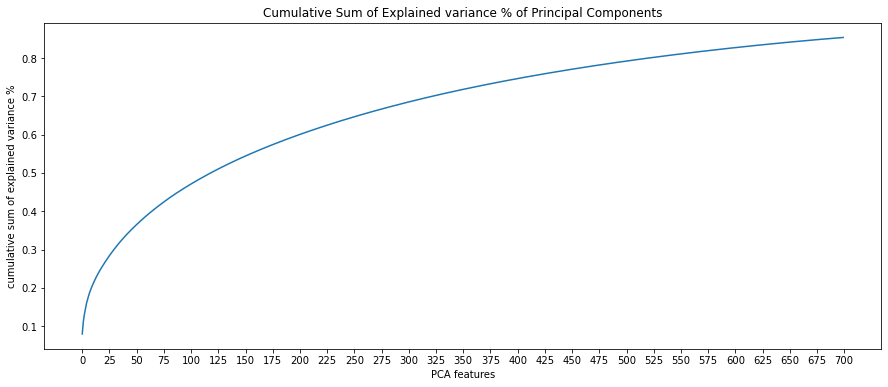

In [78]:
# Plot the cumulative sum of explained variances
plt.figure(figsize=(15,6))
plt.plot(range(700), pca.explained_variance_ratio_.cumsum()[0:700])
plt.xlabel('PCA features')
plt.ylabel('cumulative sum of explained variance %')
plt.xticks(range(0,701,25))
plt.title('Cumulative Sum of Explained variance % of Principal Components')
plt.show()

In [80]:
#I just want the explained variance closed to 80%. 500 PCA features are good enough.
pca.explained_variance_ratio_.cumsum()[500]

0.7920647137831879

In [81]:
#convert to dataframe
PCA_components = pd.DataFrame(pca_matrix)

2. Use Kmeans and elbow method to find optimal K vale

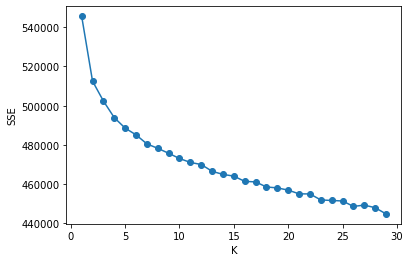

In [83]:
#elbow way to find optimal k value
#plot the SSE of K from 1 to 30

from sklearn.cluster import KMeans
cluterNum=[]
SSE = []
for i in range(1, 30):
    KM = KMeans(n_clusters=i, random_state=10)
    KM.fit(PCA_components.iloc[:,0:500])
    SSE.append(KM.inertia_)
    cluterNum.append(i)
X = range(1, 30)
plt.xlabel('K')
plt.ylabel('SSE')
plt.plot(X, SSE, 'o-')
plt.show()

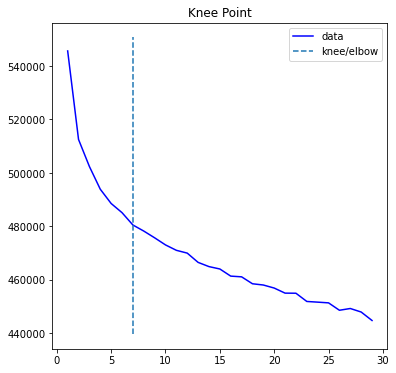

best culster number：7


In [84]:
#use kneed.KneeLocator 
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
from kneed import KneeLocator

magic=KneeLocator(cluterNum,
            SSE,
            curve='convex',
            direction='decreasing',
            online=True)
BestCluterNum=magic.elbow
magic.plot_knee()
plt.show()
print("best culster number："+str(BestCluterNum))

In [85]:
#train model based on optimal K
kmeans = KMeans(n_clusters=BestCluterNum)
kmeans = kmeans.fit(PCA_components.iloc[:,0:500])

In [86]:
kmeans.labels_

array([0, 5, 6, ..., 0, 5, 0], dtype=int32)

In [87]:
data_pca_matrix = PCA_components.iloc[:,0:500].to_numpy()
pca_feature_matrix = pca.components_[0:500,:]

In [91]:
#convert back to origianl features
df_recon = pd.DataFrame(np.matmul(data_pca_matrix,pca_feature_matrix), columns=df_pca.columns)

In [92]:
df_recon['cluster'] = kmeans.labels_

In [93]:
df_recon.head()

,index,overall,unixReviewTime,review_word_count,multipleReviews_reviewer,reviewer_five_star_only,reviewer_one_star_only,numReviews_product,1st,2nd,...,yet,york,young,youth,yummy,zane,zombie,zone,zsadist,cluster
0,-0.464507,0.268450,0.038907,-0.020660,-0.513785,0.653326,-0.057139,-0.078711,-0.015305,-0.015947,...,-0.063630,0.004510,-0.040027,-0.016120,-0.003314,0.033889,-0.035077,0.001808,-0.012251,0
1,-0.508525,-0.040224,0.039228,-0.013502,0.477672,-0.337236,-0.053077,-0.149651,-0.011833,0.010128,...,-0.052662,0.029812,-0.066517,-0.007393,-0.012413,0.024279,-0.049002,0.010696,0.014052,5
2,-0.491330,-0.037248,0.047577,-0.024462,-0.510330,-0.336912,-0.057022,-0.101878,-0.019785,-0.032545,...,-0.048920,-0.023249,-0.061049,0.001712,-0.004578,0.022931,-0.044294,-0.003024,-0.011180,6
3,-0.471991,0.125192,0.008920,-0.043922,0.491277,-0.294458,-0.120159,-0.112868,0.007539,-0.000473,...,-0.034812,-0.007032,-0.036057,0.005153,0.000730,-0.001233,0.010206,-0.005025,-0.008564,5
4,-0.461943,-0.066595,0.054708,-0.036431,-0.493453,-0.321236,-0.045681,-0.081431,0.007742,-0.006409,...,-0.070294,-0.011265,-0.082740,-0.016780,-0.007553,-0.028892,-0.045546,-0.001563,-0.011413,5


3. Find the special features of clusters (based on pre-defined features)

In [94]:
first_clust = list(df_recon.columns[0:8]) + ['cluster']

In [95]:
second_clust = list(df_recon.columns[8:])

In [99]:
df_recon.loc[:,first_clust].groupby('cluster').mean().iloc[:,1].sort_values(ascending=False)

cluster
2    0.088976
5    0.009894
0    0.001740
6   -0.031858
1   -0.045315
4   -0.050472
3   -0.074107
Name: overall, dtype: float64

In [100]:
df_recon.loc[:,first_clust].groupby('cluster').mean().iloc[:,3].sort_values(ascending=False)

cluster
3    0.251284
1    0.136979
2    0.104738
4    0.055089
6    0.005684
0   -0.014177
5   -0.027601
Name: review_word_count, dtype: float64

In [101]:
df_recon.loc[:,first_clust].groupby('cluster').mean().iloc[:,4].sort_values(ascending=False)

cluster
2    0.348097
1    0.131930
3    0.091999
6    0.073782
4    0.053200
0   -0.047464
5   -0.058483
Name: multipleReviews_reviewer, dtype: float64

In [1]:
#From the above calculation. Cluster 2 and 5 are possiblely fake review clusters.
#Cluster 2 have extremely high rating and have highest multiply reviews per reviewer.
#Cluster 5 have extremey short review words and have somehow high overall ratings.